In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
!pip install liac-arff


  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=4824adc9af8617386009c09c0381e8e0cb9e9a32fe2c4a4e50773b6561196f17
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [8]:
# Install the Kaggle API
!pip install kaggle

# Create a Kaggle directory and move the API key there
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/

# Set the correct permissions
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [9]:
# Pull the dataset
!kaggle kernels pull eneskosar19/intrusion-detection-system-nsl-kdd

# Or, if it's a dataset, use this:
!kaggle datasets download -d eneskosar19/intrusion-detection-system-nsl-kdd

# Unzip the dataset (if needed)
!unzip intrusion-detection-system-nsl-kdd.zip


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
403 - Forbidden - Permission 'datasets.get' was denied
unzip:  cannot find or open intrusion-detection-system-nsl-kdd.zip, intrusion-detection-system-nsl-kdd.zip.zip or intrusion-detection-system-nsl-kdd.zip.ZIP.


In [11]:
import os

# Check the current working directory
print("Current directory:", os.getcwd())

# List all files and folders
print("Files and folders:", os.listdir())


Current directory: /content
Files and folders: ['.config', 'KDDTest+_cleaned.arff', 'kaggle (1).json', 'KDDTest+.arff', 'sample_data']


In [12]:
from scipy.io import arff
import pandas as pd

# Load the cleaned ARFF file
file_path = "/content/KDDTest+_cleaned.arff"
data, meta = arff.loadarff(file_path)

# Convert to DataFrame
df = pd.DataFrame(data)

# Decode byte strings (if needed)
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Preview the data
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.000,tcp,private,REJ,0.000,0.000,0,0.000,0.000,0.000,...,10.000,0.040,0.060,0.000,0.000,0.000,0.000,1.000,1.000,anomaly
1,0.000,tcp,private,REJ,0.000,0.000,0,0.000,0.000,0.000,...,1.000,0.000,0.060,0.000,0.000,0.000,0.000,1.000,1.000,anomaly
2,2.000,tcp,ftp_data,SF,12983.000,0.000,0,0.000,0.000,0.000,...,86.000,0.610,0.040,0.610,0.020,0.000,0.000,0.000,0.000,normal
3,0.000,icmp,eco_i,SF,20.000,0.000,0,0.000,0.000,0.000,...,57.000,1.000,0.000,1.000,0.280,0.000,0.000,0.000,0.000,anomaly
4,1.000,tcp,telnet,RSTO,0.000,15.000,0,0.000,0.000,0.000,...,86.000,0.310,0.170,0.030,0.020,0.000,0.000,0.830,0.710,anomaly


In [14]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.000,tcp,private,REJ,0.000,0.000,0,0.000,0.000,0.000,...,10.000,0.040,0.060,0.000,0.000,0.000,0.000,1.000,1.000,anomaly
1,0.000,tcp,private,REJ,0.000,0.000,0,0.000,0.000,0.000,...,1.000,0.000,0.060,0.000,0.000,0.000,0.000,1.000,1.000,anomaly
2,2.000,tcp,ftp_data,SF,12983.000,0.000,0,0.000,0.000,0.000,...,86.000,0.610,0.040,0.610,0.020,0.000,0.000,0.000,0.000,normal
3,0.000,icmp,eco_i,SF,20.000,0.000,0,0.000,0.000,0.000,...,57.000,1.000,0.000,1.000,0.280,0.000,0.000,0.000,0.000,anomaly
4,1.000,tcp,telnet,RSTO,0.000,15.000,0,0.000,0.000,0.000,...,86.000,0.310,0.170,0.030,0.020,0.000,0.000,0.830,0.710,anomaly


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  float64
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  float64
 5   dst_bytes                    22544 non-null  float64
 6   land                         22544 non-null  object 
 7   wrong_fragment               22544 non-null  float64
 8   urgent                       22544 non-null  float64
 9   hot                          22544 non-null  float64
 10  num_failed_logins            22544 non-null  float64
 11  logged_in                    22544 non-null  object 
 12  num_compromised              22544 non-null  float64
 13  root_shell      

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,22544.000,218.859,1407.177,0.000,0.000,0.000,0.000,57715.000
src_bytes,22544.000,10395.450,472786.431,0.000,0.000,54.000,287.000,62825648.000
dst_bytes,22544.000,2056.019,21219.298,0.000,0.000,46.000,601.000,1345927.000
wrong_fragment,22544.000,0.008,0.143,0.000,0.000,0.000,0.000,3.000
urgent,22544.000,0.001,0.036,0.000,0.000,0.000,0.000,3.000
hot,22544.000,0.105,0.928,0.000,0.000,0.000,0.000,101.000
num_failed_logins,22544.000,0.022,0.150,0.000,0.000,0.000,0.000,4.000
num_compromised,22544.000,0.120,7.270,0.000,0.000,0.000,0.000,796.000
root_shell,22544.000,0.002,0.049,0.000,0.000,0.000,0.000,1.000
su_attempted,22544.000,0.000,0.021,0.000,0.000,0.000,0.000,2.000


In [17]:
df.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [18]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [19]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['tcp' 'icmp' 'udp']

Value Counts:
protocol_type
tcp     18880
udp      2621
icmp     1043
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (64): ['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u']

Value Counts:
service
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
           ... 
printer      11
ntp_u        10
rje           8
tim_i       

In [21]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify duplicates are gone
print("Remaining duplicates:", df.duplicated().sum())


Remaining duplicates: 0


In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(22541, 42)

<Figure size 2000x4000 with 0 Axes>

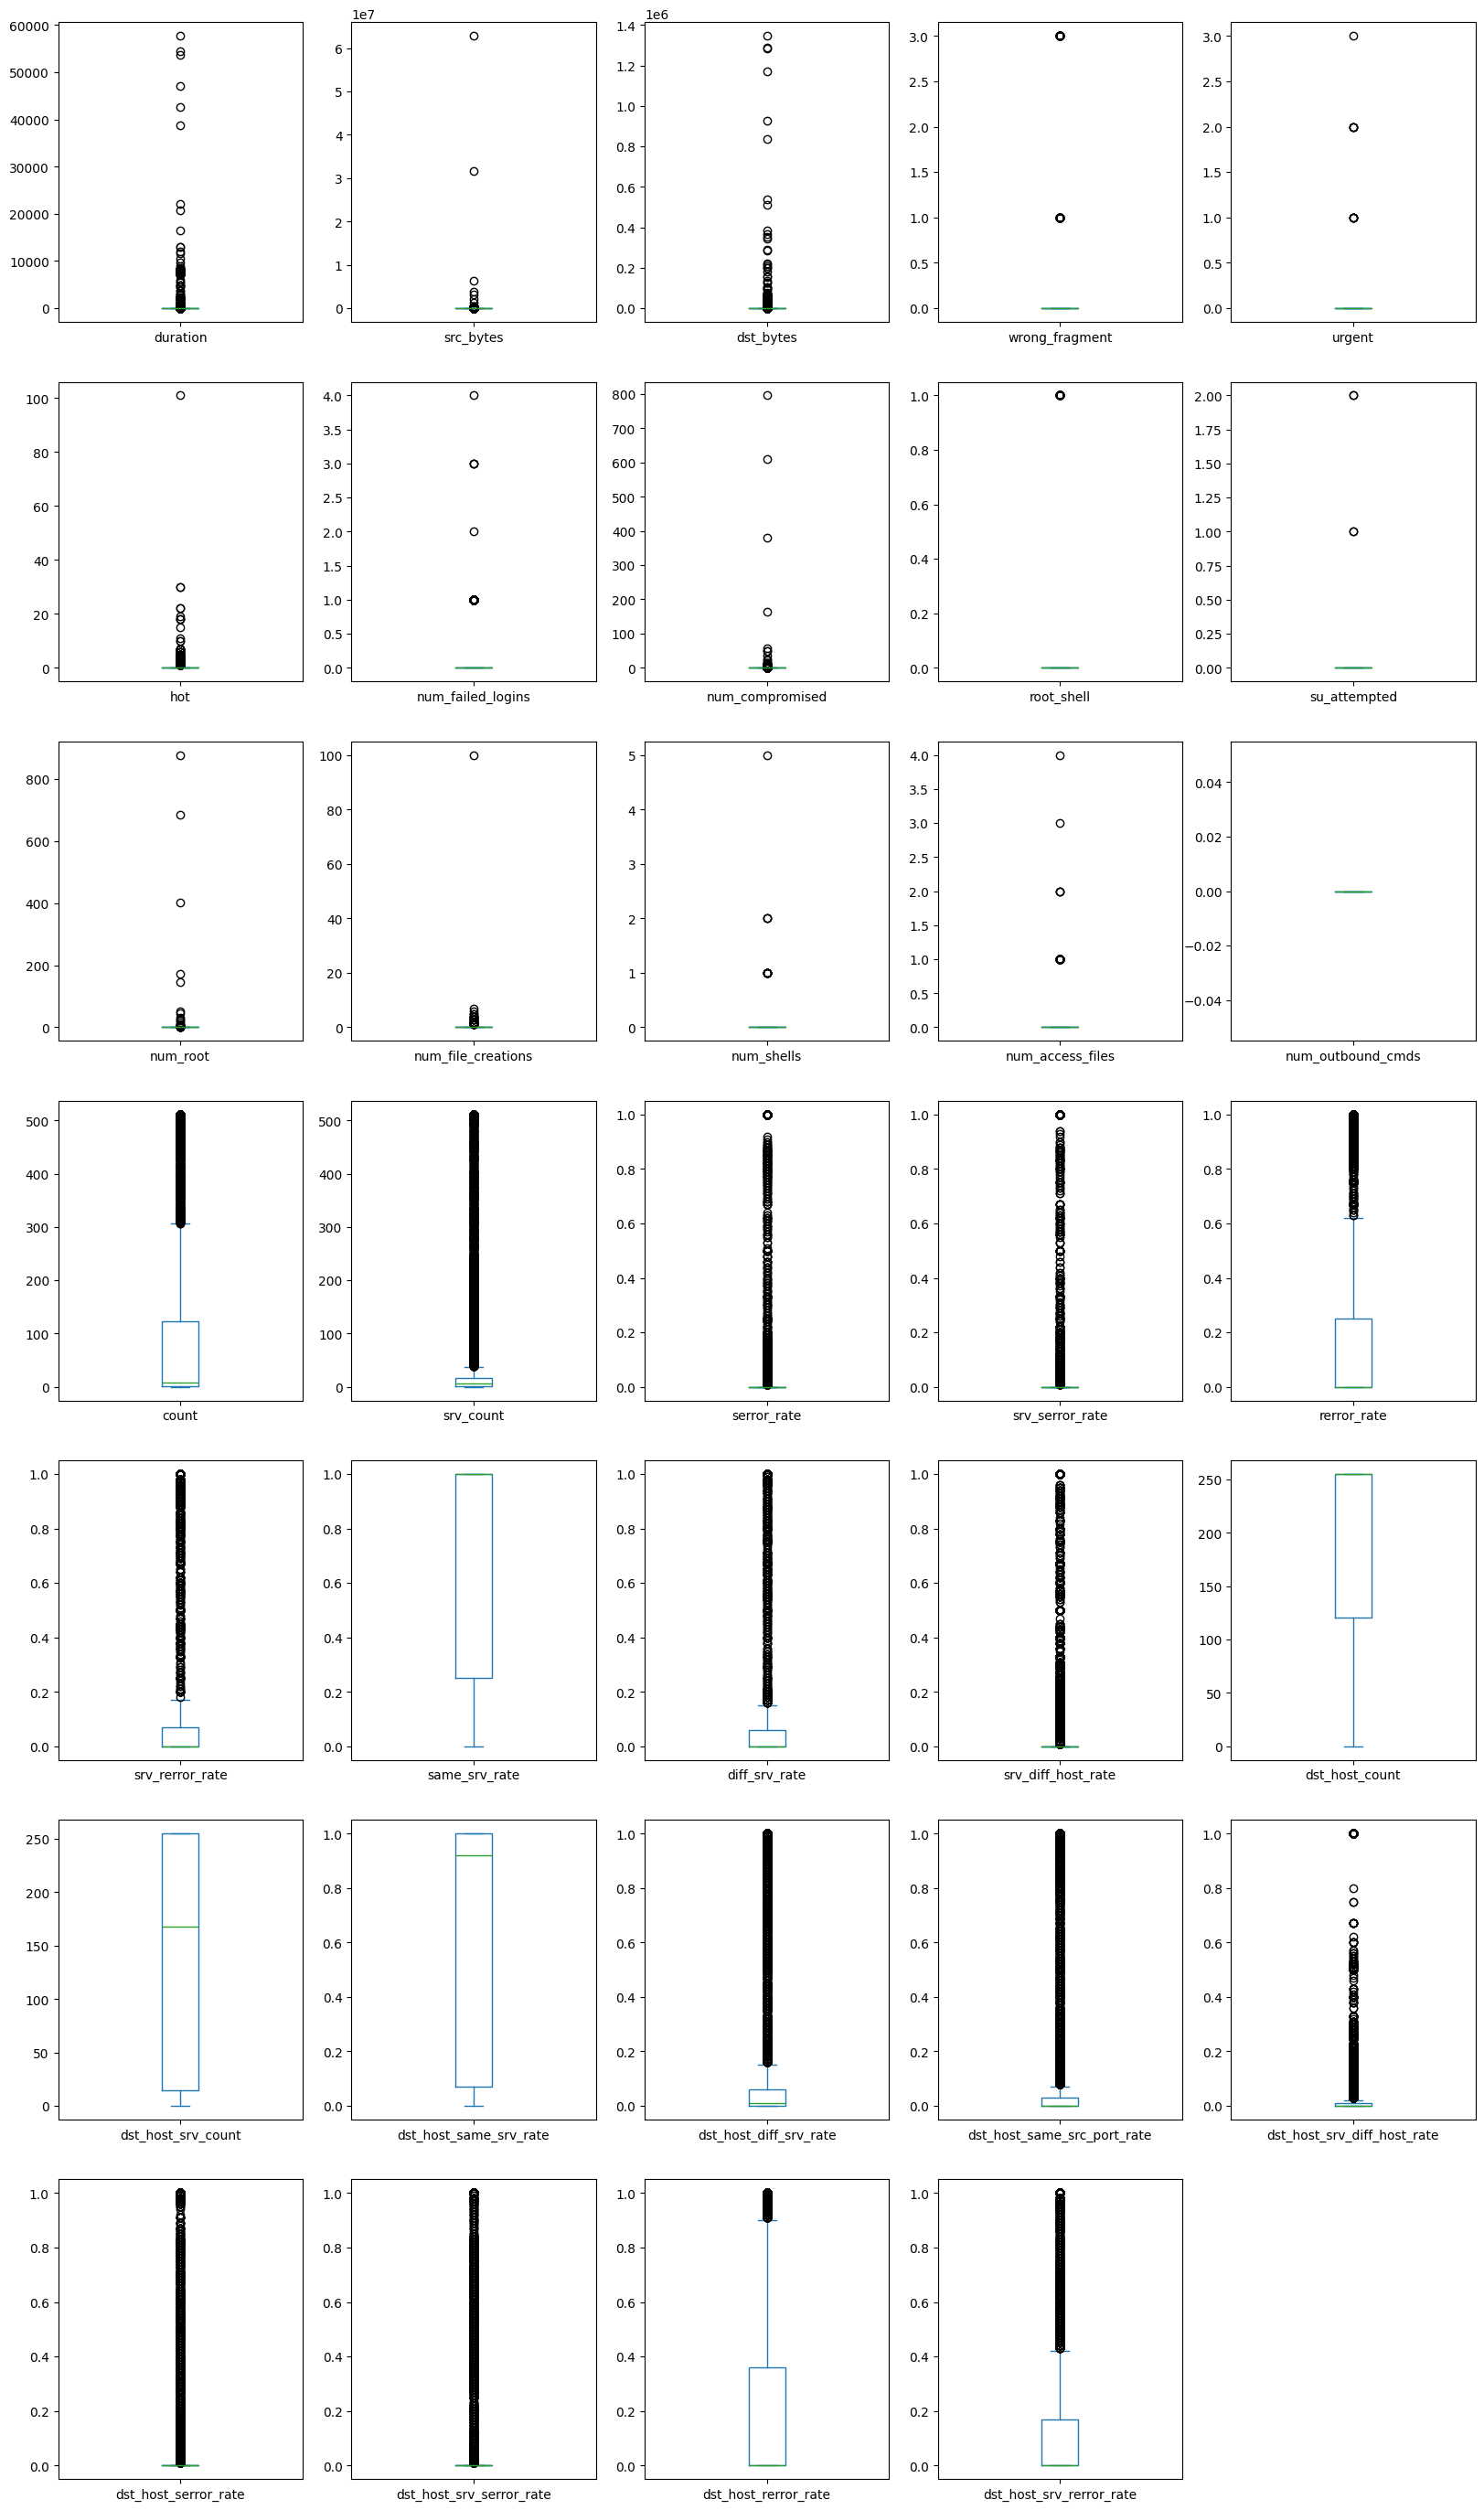

In [24]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

In [26]:
# List all column names
print(df.columns)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


In [27]:
df['attack_type'] = ['normal' if i == 'normal' else 'attack' for i in df['class']]


In [29]:
attack_n = []
for i in df['class']:
    if i == 'normal':
        attack_n.append("normal")
    else:
        attack_n.append("attack")


In [33]:
df['class'].unique()

array(['anomaly', 'normal'], dtype=object)

In [34]:
df['attack_type'] = ['normal' if i == 'normal' else 'attack' for i in df['class']]


In [35]:
attack_mapping = {
    'normal': 'normal',
    'back': 'dos', 'land': 'dos', 'neptune': 'dos', 'pod': 'dos',
    'smurf': 'dos', 'teardrop': 'dos',
    'satan': 'probe', 'ipsweep': 'probe', 'nmap': 'probe', 'portsweep': 'probe',
    'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'multihop': 'r2l',
    'phf': 'r2l', 'spy': 'r2l', 'warezclient': 'r2l', 'warezmaster': 'r2l',
    'buffer_overflow': 'u2r', 'loadmodule': 'u2r', 'perl': 'u2r', 'rootkit': 'u2r'
}

df['attack_category'] = df['class'].map(attack_mapping)


In [36]:
print(df[['class', 'attack_type']].head())  # For binary classification
print(df[['class', 'attack_category']].head())  # For multi-class


     class attack_type
0  anomaly      attack
1  anomaly      attack
2   normal      normal
3  anomaly      attack
4  anomaly      attack
     class attack_category
0  anomaly             NaN
1  anomaly             NaN
2   normal          normal
3  anomaly             NaN
4  anomaly             NaN


In [37]:
attack_mapping = {
    'normal': 'normal',
    'anomaly': 'attack',  # Map anomaly as a general attack
    'back': 'dos', 'land': 'dos', 'neptune': 'dos', 'pod': 'dos',
    'smurf': 'dos', 'teardrop': 'dos',
    'satan': 'probe', 'ipsweep': 'probe', 'nmap': 'probe', 'portsweep': 'probe',
    'ftp_write': 'r2l', 'guess_passwd': 'r2l', 'imap': 'r2l', 'multihop': 'r2l',
    'phf': 'r2l', 'spy': 'r2l', 'warezclient': 'r2l', 'warezmaster': 'r2l',
    'buffer_overflow': 'u2r', 'loadmodule': 'u2r', 'perl': 'u2r', 'rootkit': 'u2r'
}

df['attack_category'] = df['class'].map(attack_mapping).fillna('unknown')


In [38]:
print(df[['class', 'attack_type', 'attack_category']].head())


     class attack_type attack_category
0  anomaly      attack          attack
1  anomaly      attack          attack
2   normal      normal          normal
3  anomaly      attack          attack
4  anomaly      attack          attack


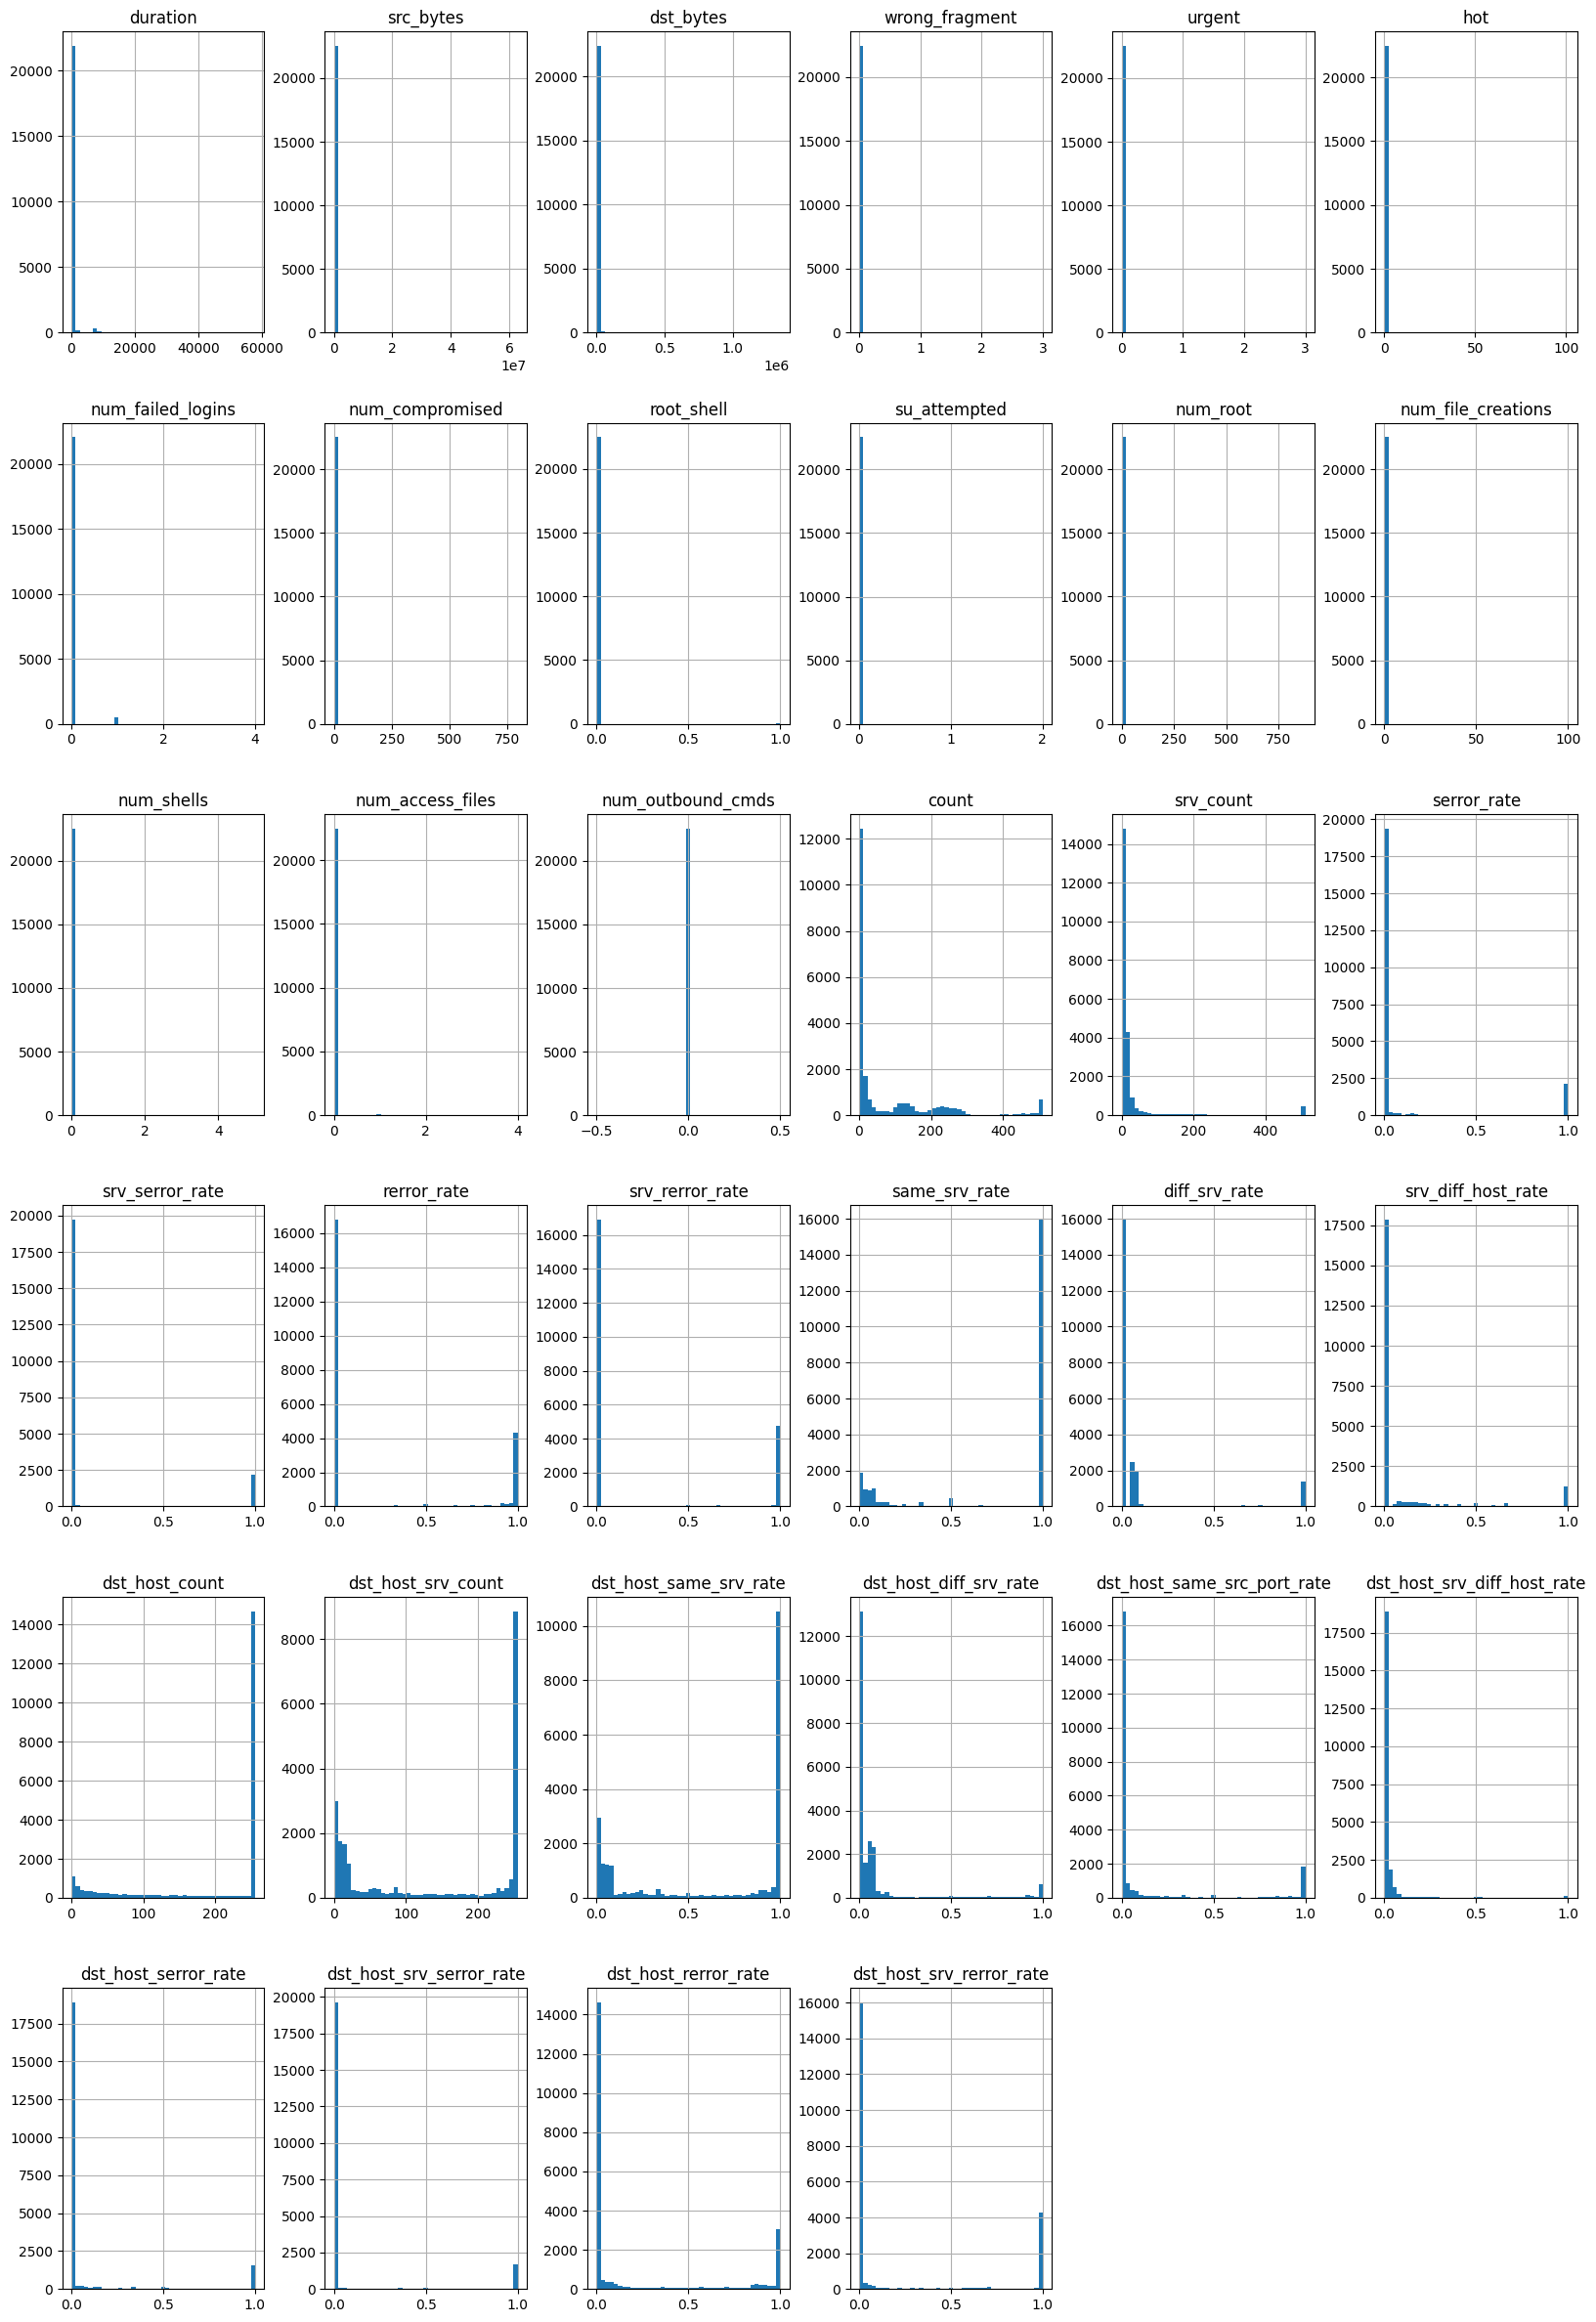

In [39]:
df.hist(bins=43,figsize=(20,30));

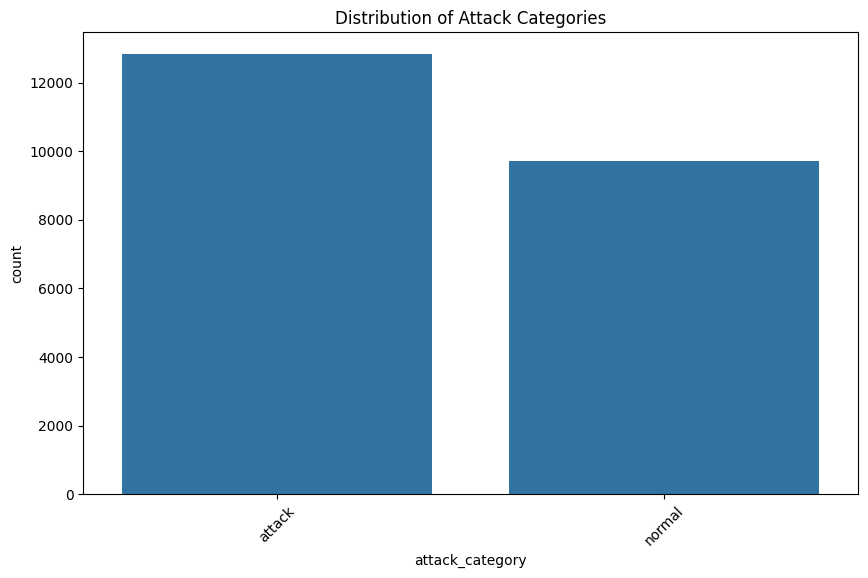

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='attack_category', data=df, order=df['attack_category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Attack Categories")
plt.show()


In [42]:
from sklearn.model_selection import train_test_split

X = df.drop(['class', 'attack_type', 'attack_category'], axis=1)
y = df['attack_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
df["protocol_type"].value_counts(normalize=True)

,proportion
protocol_type,
tcp,0.837
udp,0.116
icmp,0.046


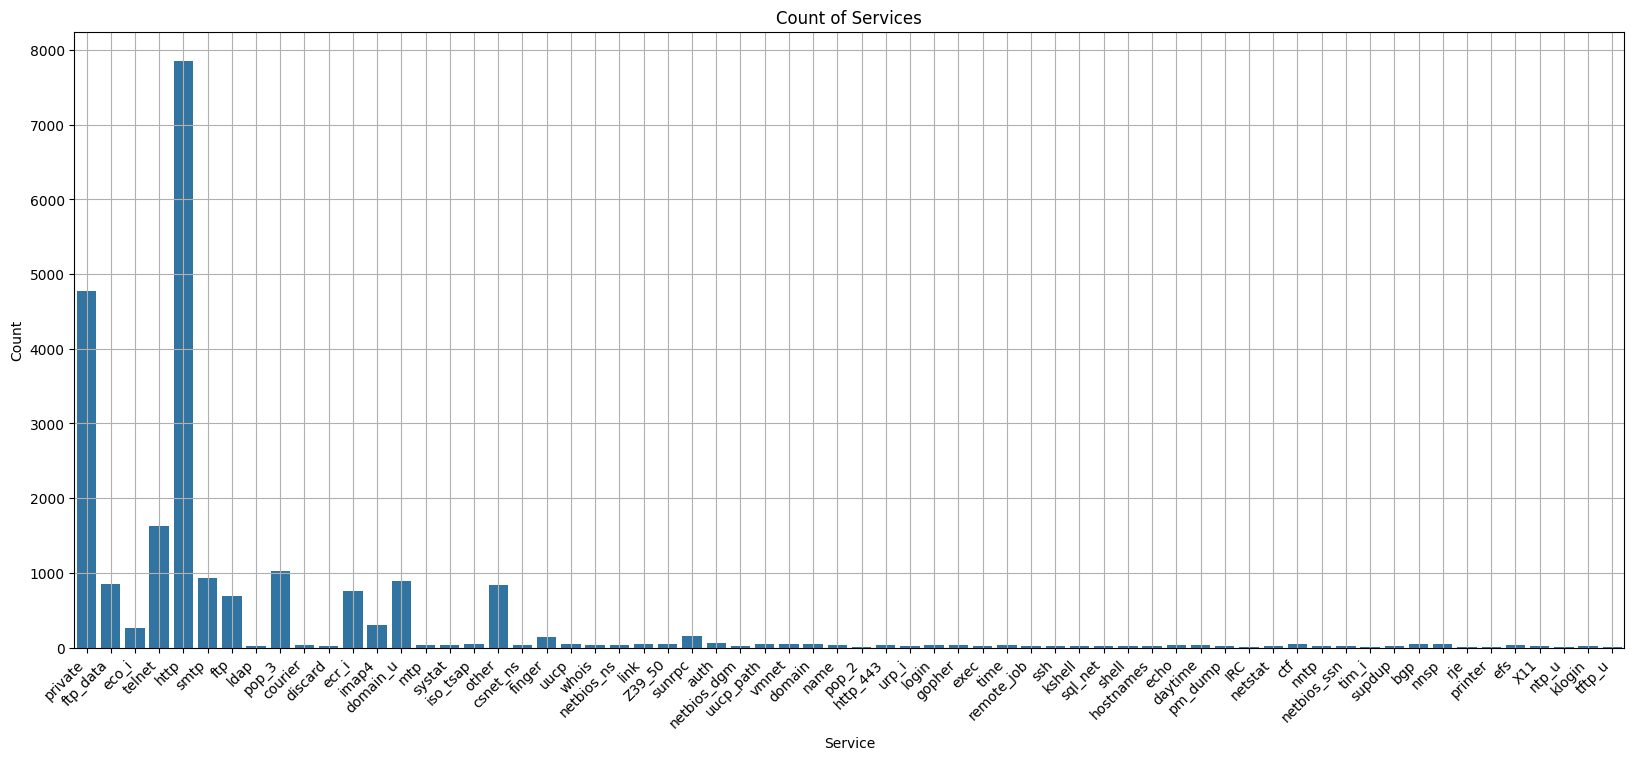

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

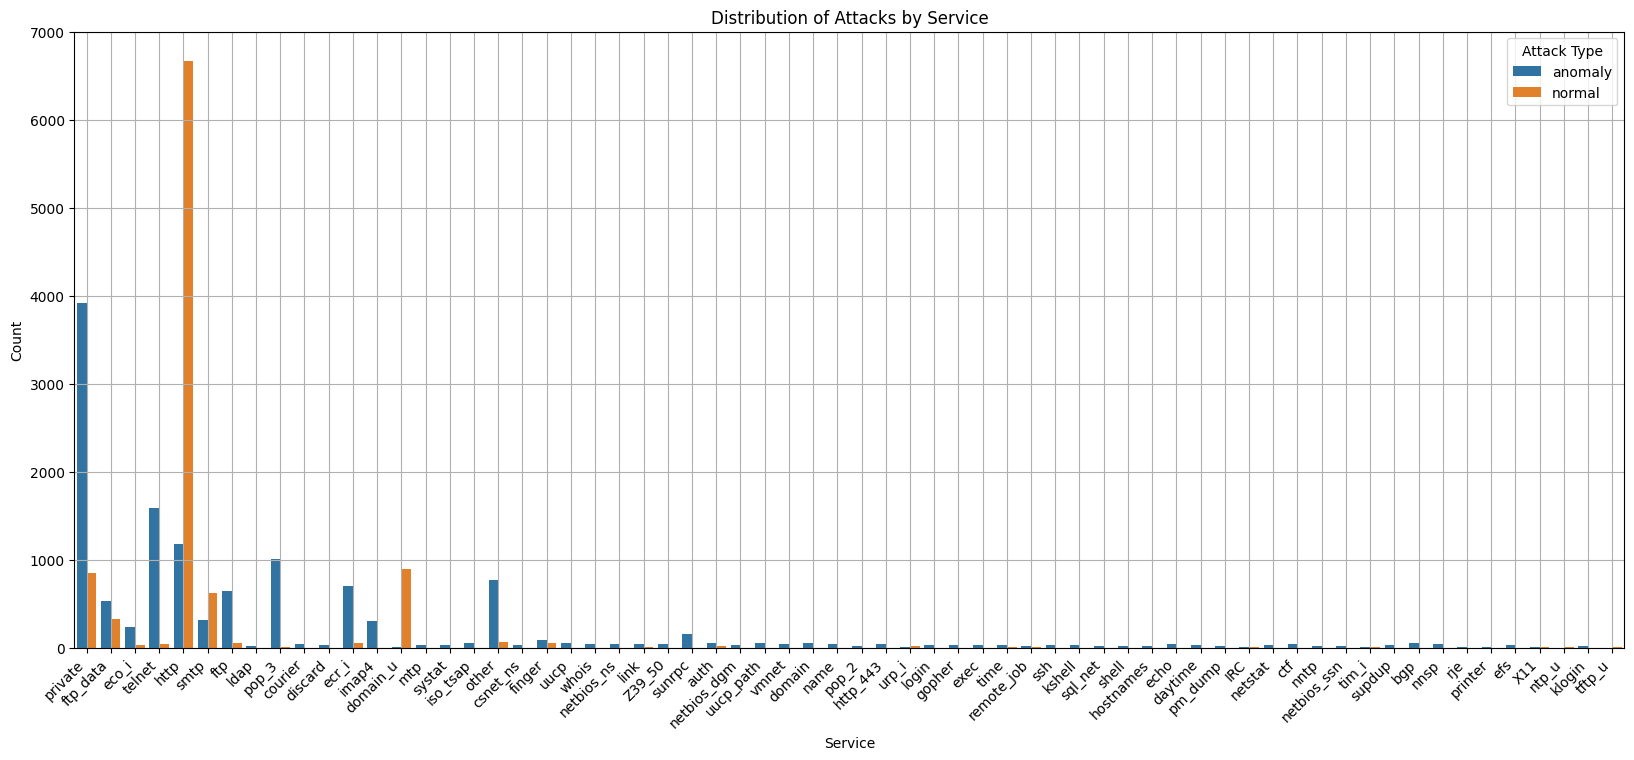

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='class', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

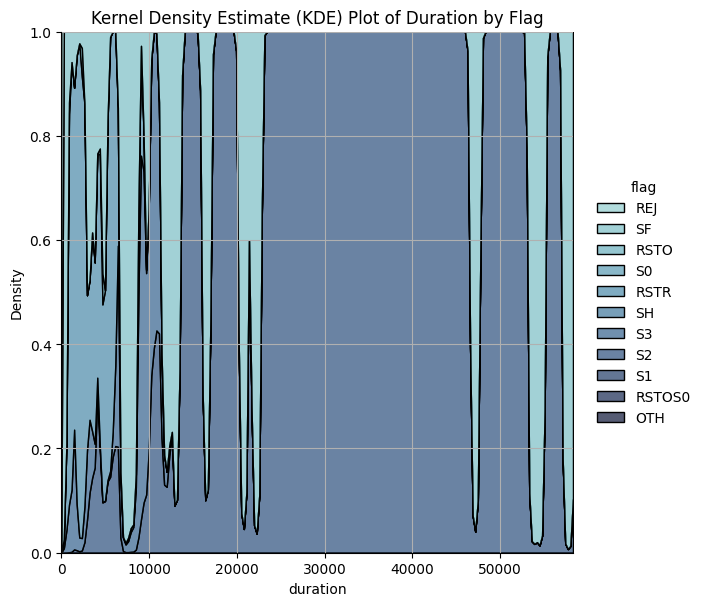

In [47]:
plt.figure(figsize=(12, 8))
sns.displot(
    data=df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

X = df.drop(['class', 'attack_type', 'attack_category'], axis=1)
y = df['attack_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'land', 'logged_in',
       'is_host_login', 'is_guest_login', 'class', 'attack_type',
       'attack_category'],
      dtype='object')

In [52]:
df.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'attack_type', 'attack_category'],
      dtype='object')

In [53]:
X = df.drop(['class', 'attack_type', 'attack_category'], axis=1)
y = df['attack_category']


In [54]:
y = df['attack_type']


In [55]:
df.columns


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'attack_type', 'attack_category'],
      dtype='object')

In [56]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['land', 'logged_in', 'is_host_login', 'is_guest_login', 'class',
       'attack_type', 'attack_category'],
      dtype='object')

In [57]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
clm = ['protocol_type', 'service', 'flag', 'attack_category']

for col in clm:
    df[col] = le.fit_transform(df[col])


In [58]:
from sklearn.model_selection import train_test_split

X = df.drop(["attack_category"], axis=1)  # Use 'attack_category' as the target
y = df["attack_category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)


In [59]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'attack_type'],
      dtype='object')

In [63]:
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif

# Encode categorical features
X_train_encoded = X_train.apply(le.fit_transform)

# Encode the target labels
y_train_encoded = le.fit_transform(y_train)

# Calculate mutual information
mutual_info = mutual_info_classif(X_train_encoded, y_train_encoded)

# Convert to a pandas Series with feature names as the index
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns

# Sort the values in descending order
mutual_info.sort_values(ascending=False, inplace=True)

# Print or visualize the results
print(mutual_info)



class                         0.686
attack_type                   0.686
src_bytes                     0.536
dst_bytes                     0.489
service                       0.338
flag                          0.240
dst_host_srv_count            0.236
dst_host_same_srv_rate        0.234
dst_host_diff_srv_rate        0.233
dst_host_rerror_rate          0.216
dst_host_srv_rerror_rate      0.181
count                         0.180
diff_srv_rate                 0.177
same_srv_rate                 0.170
logged_in                     0.162
rerror_rate                   0.156
srv_rerror_rate               0.150
dst_host_srv_diff_host_rate   0.135
dst_host_same_src_port_rate   0.118
srv_diff_host_rate            0.104
dst_host_serror_rate          0.088
dst_host_count                0.086
serror_rate                   0.079
dst_host_srv_serror_rate      0.078
srv_serror_rate               0.068
duration                      0.062
srv_count                     0.058
protocol_type               

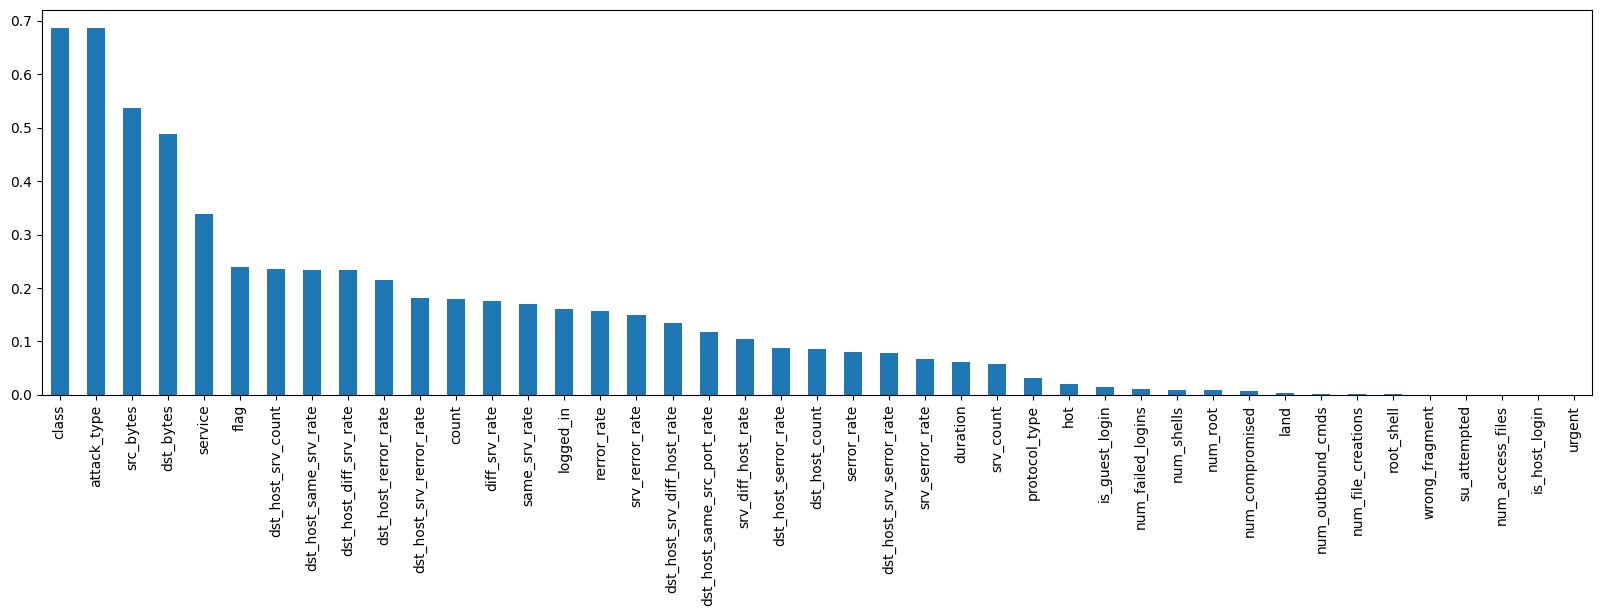

In [64]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

In [66]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Apply SelectKBest with mutual information
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train_encoded, y_train_encoded)

# Get the names of the selected features
selected_features = X_train.columns[Select_features.get_support()]

# Print the selected features
print(selected_features)


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'num_failed_logins', 'logged_in', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class',
       'attack_type'],
      dtype='object')


In [67]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

#We will continue our model with top 15 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # we use only transform in order to prevent data leakage

In [69]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [70]:
XGBoost_model = XGBClassifier(random_state = 42)
Logistic_model = LogisticRegression(random_state=42)

In [71]:
XGBoost = XGBoost_model.fit(X_train,y_train)

In [72]:
Logistic = Logistic_model.fit(X_train,y_train)

In [73]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [74]:
#it's a helper function in order to evaluate our model if it's overfit or underfit.
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [75]:
eval_metric(Logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[1217   84]
 [ 164  790]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1301
           1       0.90      0.83      0.86       954

    accuracy                           0.89      2255
   macro avg       0.89      0.88      0.89      2255
weighted avg       0.89      0.89      0.89      2255


Train_Set
[[10767   762]
 [ 1417  7340]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     11529
           1       0.91      0.84      0.87      8757

    accuracy                           0.89     20286
   macro avg       0.89      0.89      0.89     20286
weighted avg       0.89      0.89      0.89     20286



In [76]:
eval_metric(XGBoost_model, X_train, y_train, X_test, y_test)

Test_Set
[[1287   14]
 [  11  943]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1301
           1       0.99      0.99      0.99       954

    accuracy                           0.99      2255
   macro avg       0.99      0.99      0.99      2255
weighted avg       0.99      0.99      0.99      2255


Train_Set
[[11450    79]
 [   62  8695]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11529
           1       0.99      0.99      0.99      8757

    accuracy                           0.99     20286
   macro avg       0.99      0.99      0.99     20286
weighted avg       0.99      0.99      0.99     20286



In [77]:
param_grid = {
    "n_estimators": [50,64,100,128],
    "max_depth": [2, 3, 4,5,6],
    "learning_rate": [0.01,0,0.03, 0.05, 0.1],
    "subsample": [0.5, 0.8],
    "colsample_bytree": [0.5, 0.8]
}

In [78]:
XGB_model = XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=128,
    subsample=0.8
)

# Fit the classifier to your data
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [79]:
y_pred = XGB_model.predict(X_test)
y_pred_proba = XGB_model.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

In [80]:
xgb_auc

0.999298233740535

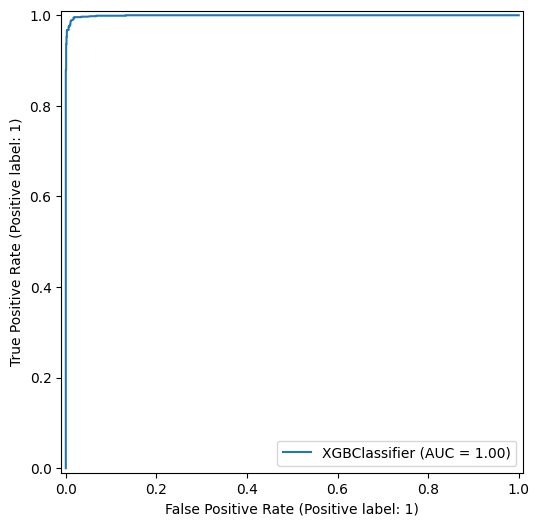

In [81]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(XGB_model, X_test, y_test);


In [82]:
eval_metric(XGB_model, X_train, y_train, X_test, y_test)


Test_Set
[[1287   14]
 [  13  941]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1301
           1       0.99      0.99      0.99       954

    accuracy                           0.99      2255
   macro avg       0.99      0.99      0.99      2255
weighted avg       0.99      0.99      0.99      2255


Train_Set
[[11422   107]
 [   85  8672]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11529
           1       0.99      0.99      0.99      8757

    accuracy                           0.99     20286
   macro avg       0.99      0.99      0.99     20286
weighted avg       0.99      0.99      0.99     20286



In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(logistic_model, X_test, y_test, "Logistic Regression")

# Plot confusion matrix for XGBoost
plot_confusion_matrix(xgb_model, X_test, y_test, "XGBoost")


NameError: name 'logistic_model' is not defined

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_colored_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()


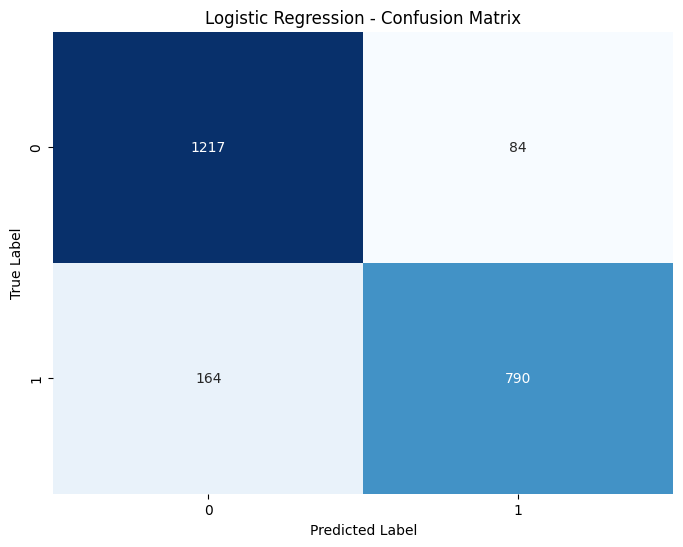

In [108]:
# Train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Now plot the confusion matrix
plot_colored_confusion_matrix(logistic_model, X_test, y_test, "Logistic Regression")


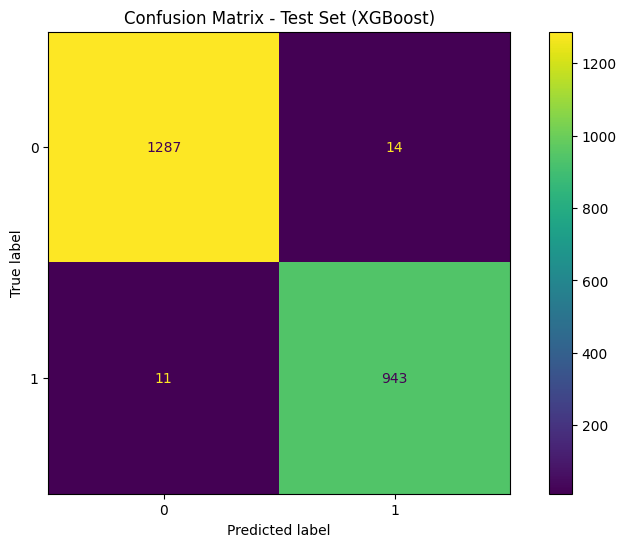

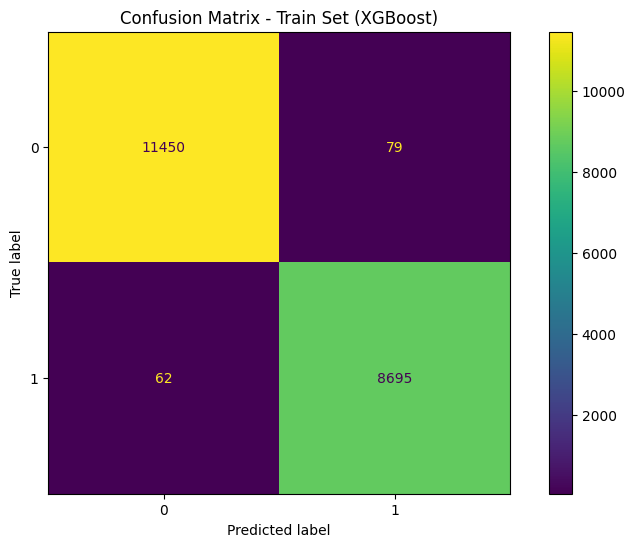

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plotting the confusion matrix for test data
ConfusionMatrixDisplay.from_predictions(y_test, XGBoost_model.predict(X_test),
                                        cmap='viridis', colorbar=True)
plt.title("Confusion Matrix - Test Set (XGBoost)")
plt.show()

# Plotting the confusion matrix for train data
ConfusionMatrixDisplay.from_predictions(y_train, XGBoost_model.predict(X_train),
                                        cmap='viridis', colorbar=True)
plt.title("Confusion Matrix - Train Set (XGBoost)")
plt.show()



In [88]:
!pip install scapy

import scapy.all as scapy
from scapy.layers.inet import IP, TCP, UDP
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler

In [93]:
model = XGBoost_model  # Or Logistic_model, depending on your choice

# Save the model and scaler to files
joblib.dump(model, "network_intrusion_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [94]:
model = joblib.load("network_intrusion_model.pkl")
scaler = joblib.load("scaler.pkl")


In [95]:
model = Logistic_model  # Use the logistic regression model

# Save the logistic regression model and scaler
joblib.dump(model, "logistic_intrusion_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [96]:
model = joblib.load("logistic_intrusion_model.pkl")
scaler = joblib.load("scaler.pkl")


In [97]:


# Feature extraction function
def extract_features(packet):
    if IP in packet:
        features = [
            len(packet),                          # Packet length
            packet[IP].ttl,                       # Time to live (TTL)
            packet[IP].tos,                       # Type of service (TOS)
            packet[IP].flags.value,               # IP flags
            packet[IP].ihl,                       # IP header length
            packet[IP].frag,                      # Fragment offset
            packet[IP].proto,                     # Protocol type (TCP/UDP/ICMP)
        ]

        if TCP in packet:
            features.extend([
                packet[TCP].sport,                # Source port
                packet[TCP].dport,                # Destination port
                packet[TCP].seq,                  # Sequence number
                packet[TCP].ack,                  # Acknowledgment number
                packet[TCP].dataofs,              # Data offset
                packet[TCP].window,              # Window size
                packet[TCP].flags.value,         # TCP flags
            ])

        elif UDP in packet:
            features.extend([
                packet[UDP].sport,                # Source port
                packet[UDP].dport,                # Destination port
                len(packet[UDP].payload)          # UDP payload length
            ])

        # Pad with zeros if fewer features than expected
        while len(features) < 15:
            features.append(0)

        return np.array(features)
    else:
        return np.zeros(15)




In [99]:
# Real-time packet sniffing and prediction with timeout
def process_packet(packet):
    features = extract_features(packet)
    features = features.reshape(1, -1)
    features = scaler.transform(features)

    prediction = model.predict(features)
    attack_label = "Attack" if prediction[0] == 1 else "Normal"

    print(f"Packet captured: {packet.summary()}")
    print(f"Prediction: {attack_label}\n")

# Start sniffing packets for 60 seconds
print("Starting real-time packet sniffing... It will stop after 60 seconds.")
scapy.sniff(prn=process_packet, store=False, timeout=60)


Starting real-time packet sniffing... It will stop after 60 seconds.
Packet captured: Ether / IP / TCP 172.28.0.12:8080 > 172.28.0.1:59114 PA / Raw
Prediction: Attack

Packet captured: Ether / IP / TCP 172.28.0.1:59114 > 172.28.0.12:8080 A
Prediction: Attack

Packet captured: Ether / IP / TCP 172.28.0.12:8080 > 172.28.0.1:59134 PA / Raw
Prediction: Normal

Packet captured: Ether / IP / TCP 172.28.0.1:59134 > 172.28.0.12:8080 A
Prediction: Attack

Packet captured: Ether / IP / TCP 172.28.0.12:8080 > 172.28.0.1:53912 PA / Raw
Prediction: Attack

Packet captured: Ether / IP / TCP 172.28.0.1:53912 > 172.28.0.12:8080 A
Prediction: Attack

Packet captured: Ether / IP / TCP 172.28.0.12:8080 > 172.28.0.1:53964 PA / Raw
Prediction: Normal

Packet captured: Ether / IP / TCP 172.28.0.1:53964 > 172.28.0.12:8080 A
Prediction: Attack

Packet captured: Ether / IP / TCP 172.28.0.12:8080 > 172.28.0.1:59114 PA / Raw
Prediction: Attack

Packet captured: Ether / IP / TCP 172.28.0.1:59114 > 172.28.0.12:808

<Sniffed: TCP:0 UDP:0 ICMP:0 Other:0>